## Imports & Setup

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Compose, Resize, RandomHorizontalFlip, RandomAdjustSharpness, Grayscale, Normalize
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from helpers import *
from architecture.AutoEncoder import *
from architecture.Transformer import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Prepare Dataset

In [3]:
size = 32
batch_size = 128
transformation = Compose([RandomHorizontalFlip(), Resize((size, size)), Grayscale(1),
                          RandomAdjustSharpness(2, p=1),
                          ToTensor(), Normalize(mean=[0.4814], std=[0.2136])])

In [4]:
root = 'chest_xray/test'
test_data = create_dataset(root, transformation)
test_loader = produce_loader(test_data, batch_size)

## Transformer

In [7]:
from math import floor
# number of convolutional 'embedding' layers and their sizes
hidden = [1, 256, 64, 32]

# kernel size of convolution layers
kernel_size = 3

# window size of maxpooling layer
window = 2

# calculate final size of image
channels = hidden[-1]
changed_img = floor( (size-(kernel_size-1)*(len(hidden)-1)) / window )

# calculate dimension of flattened image
flattened = channels*changed_img*changed_img
blocks = [flattened, 512, 64]

In [8]:
transformer = Transformer(hidden, kernel_size, window, blocks).to(device)
transformer.load_state_dict(torch.load('./Transformer_3epochs')["model_state_dict"])
for param in transformer.parameters():
    param.requiresGrad = False

Test loss: 0.4135, Test accuracy: 0.8632
Precision: 0.8562628336755647
Recall: 0.9765807962529274
F1 score: 0.912472647702407


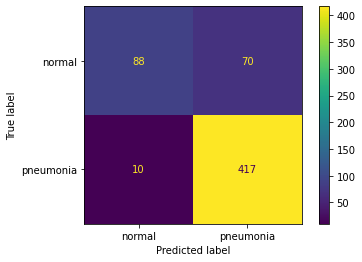

In [9]:
true_labels, model_preds, test_loss, test_accuracy = test(device=device, model=transformer, 
                                                          data_loader=test_loader, get_predictions=True)
show_metrics(true_labels=true_labels, model_preds=model_preds)

In [10]:
# checkpoint made at 1 epoch
transformer.load_state_dict(torch.load('./Transformer_checkpoint')["model_state_dict"])
for param in transformer.parameters():
    param.requiresGrad = False

Test loss: 0.3897, Test accuracy: 0.8376
Precision: 0.8443983402489627
Recall: 0.9531615925058547
F1 score: 0.8954895489548954


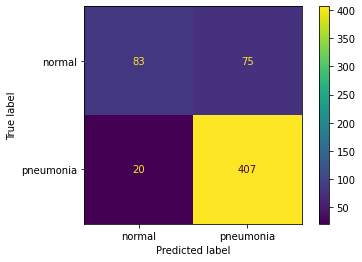

In [11]:
true_labels, model_preds, test_loss, test_accuracy = test(device=device, model=transformer, 
                                                          data_loader=test_loader, get_predictions=True)
show_metrics(true_labels=true_labels, model_preds=model_preds)

## Initialise Autoencoder

In [5]:
# number of hidden layers and their sizes
hidden_a = [1, 32, 64, 128, 256]

# kernel size of convolution layers
kernel_size_a = 3

In [6]:
autoencmodel = AutoEncoder(hidden_a, kernel_size_a).to(device)
autoencmodel.load_state_dict(torch.load("./autoencoder256_4epochs")["model_state_dict"])
for param in autoencmodel.parameters():
    param.requiresGrad = False

## Transformer with Autoencoder

In [12]:
from math import floor
# number of hidden layers and their sizes
hidden = [256, 256, 64, 32]

# kernel size of convolution layers
kernel_size = 3

# window size of maxpooling layer
window = 2

# calculate final size of image
new_size = size-(kernel_size_a-1)*(len(hidden_a)-1)
channels = hidden[-1]
changed_img = floor( (new_size-(kernel_size-1)*(len(hidden)-1)) / window )

# calculate dimension of flattened image
flattened = channels*changed_img*changed_img
blocks = [flattened, 512, 64]

In [13]:
transformer = Transformer(hidden, kernel_size, window, blocks).to(device)
transformer.load_state_dict(torch.load('./Transformer_12epochs_withAE')["model_state_dict"])
for param in transformer.parameters():
    param.requiresGrad = False

Test loss: 0.3533, Test accuracy: 0.8735
Precision: 0.8779443254817987
Recall: 0.9601873536299765
F1 score: 0.9172259507829977


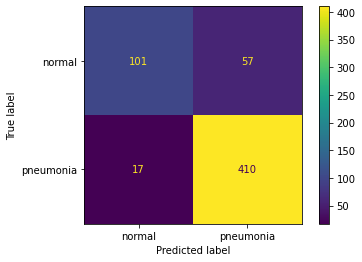

In [14]:
true_labels, model_preds, test_loss, test_accuracy = test(device=device, model=transformer, 
                                                          data_loader=test_loader, autoencoder=autoencmodel,
                                                          get_predictions=True)
show_metrics(true_labels=true_labels, model_preds=model_preds)

In [15]:
transformer.load_state_dict(torch.load('./Transformer_15epochs_withAE')["model_state_dict"])
for param in transformer.parameters():
    param.requiresGrad = False

Test loss: 0.3544, Test accuracy: 0.8786
Precision: 0.8938053097345132
Recall: 0.9461358313817331
F1 score: 0.919226393629124


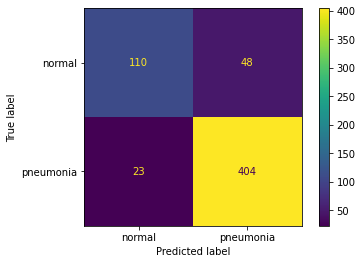

In [16]:
true_labels, model_preds, test_loss, test_accuracy = test(device=device, model=transformer, 
                                                          data_loader=test_loader, autoencoder=autoencmodel,
                                                          get_predictions=True)
show_metrics(true_labels=true_labels, model_preds=model_preds)

In [17]:
transformer.load_state_dict(torch.load('./Transformer_16epochs_withAE')["model_state_dict"])
for param in transformer.parameters():
    param.requiresGrad = False

Test loss: 0.3544, Test accuracy: 0.8701
Precision: 0.8618556701030928
Recall: 0.9789227166276346
F1 score: 0.9166666666666667


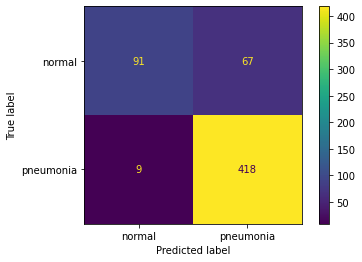

In [18]:
true_labels, model_preds, test_loss, test_accuracy = test(device=device, model=transformer, 
                                                          data_loader=test_loader, autoencoder=autoencmodel,
                                                          get_predictions=True)
show_metrics(true_labels=true_labels, model_preds=model_preds)

In [19]:
transformer.load_state_dict(torch.load('./Transformer_18epochs_withAE')["model_state_dict"])
for param in transformer.parameters():
    param.requiresGrad = False

Test loss: 0.3264, Test accuracy: 0.8821
Precision: 0.8808510638297873
Recall: 0.9695550351288056
F1 score: 0.9230769230769231


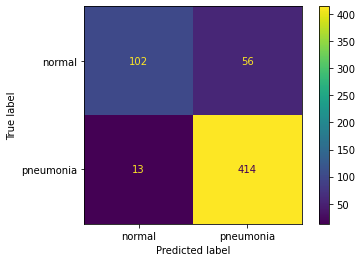

In [20]:
true_labels, model_preds, test_loss, test_accuracy = test(device=device, model=transformer, 
                                                          data_loader=test_loader, autoencoder=autoencmodel,
                                                          get_predictions=True)
show_metrics(true_labels=true_labels, model_preds=model_preds)

In [21]:
transformer.load_state_dict(torch.load('./Transformer_19epochs_withAE')["model_state_dict"])
for param in transformer.parameters():
    param.requiresGrad = False

Test loss: 0.3185, Test accuracy: 0.8906
Precision: 0.9042316258351893
Recall: 0.9508196721311475
F1 score: 0.9269406392694063


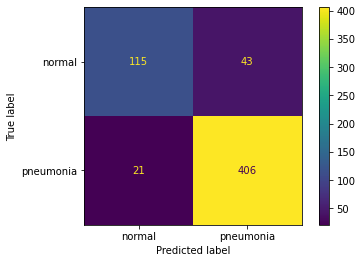

In [22]:
true_labels, model_preds, test_loss, test_accuracy = test(device=device, model=transformer, 
                                                          data_loader=test_loader, autoencoder=autoencmodel,
                                                          get_predictions=True)
show_metrics(true_labels=true_labels, model_preds=model_preds)